In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

num_classes = 10
num_features = 784

x_train, x_test = tf.reshape(x_train, [-1, 784]), tf.reshape(x_test, [-1, 784])
x_train = x_train / 255.
x_test = x_test/255.

In [28]:
from tensorflow.keras import Model, layers

class NeuralNet(Model):
    def __init__(self):
        super().__init__()
        self.fc1 = layers.Dense(128, activation = tf.nn.relu)
        self.fc2 = layers.Dense(256, activation = tf.nn.relu)
        self.out = layers.Dense(num_classes)
        
    def call(self, x, is_training = False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

In [29]:
neural_net = NeuralNet()

In [33]:
def cross_entropy_loss(x,y):
    y = tf.cast(y,tf.int64)
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = x)
    return tf.reduce_mean(loss)

In [40]:
lr = 0.01
optimizer = tf.optimizers.SGD(lr)

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=False)
        loss = cross_entropy_loss(pred, y)
        
    parameters = neural_net.trainable_variables
    gradients = g.gradient(loss, parameters)
    optimizer.apply_gradients(zip(gradients, parameters))

In [41]:
batch_size = 200
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(60000).batch(batch_size).prefetch(1)

epoch = 40
display_epoch = 4

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

for epo in range(1,epoch+1):
    for setp, (batch_x, batch_y) in enumerate(train_data, 1):
        run_optimization(batch_x, batch_y)
    
    if epo % display_epoch == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print('epoch : ', epo, 'loss : ', loss.numpy(), 'acc : ', acc.numpy())

epoch :  4 loss :  1.8014697 acc :  0.71
epoch :  8 loss :  1.7418643 acc :  0.775
epoch :  12 loss :  1.706739 acc :  0.785
epoch :  16 loss :  1.6601273 acc :  0.805
epoch :  20 loss :  1.6339008 acc :  0.845
epoch :  24 loss :  1.6306887 acc :  0.855
epoch :  28 loss :  1.6272211 acc :  0.845
epoch :  32 loss :  1.6157135 acc :  0.86
epoch :  36 loss :  1.6374359 acc :  0.835
epoch :  40 loss :  1.6093841 acc :  0.86


In [42]:
pred = neural_net(x_test)
print("Test Accuracy : ", accuracy(pred, y_test).numpy())

Test Accuracy :  0.8412


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [44]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

num_classes = 10
num_features = 784

x_train = x_train / 255.
x_test = x_test/255.

In [45]:
layer1 = Flatten(input_shape = (28,28))
layer2 = Dense(128, activation = 'relu')
layer3 = Dense(256, activation = 'relu')
layer4 = Dense(10)

In [46]:
mlp = Sequential([layer1, layer2, layer3, layer4])

In [51]:
mlp.compile(optimizer = tf.keras.optimizers.SGD(0.01),
           loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
           metrics = ['accuracy'])

In [55]:
result = mlp.fit(x_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 851us/step - loss: 0.1101 - accuracy: 0.9687
Epoch 2/10
1875/1875 [==============================] - 2s 869us/step - loss: 0.1023 - accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 2s 880us/step - loss: 0.0957 - accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 2s 892us/step - loss: 0.0895 - accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 2s 916us/step - loss: 0.0842 - accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 2s 847us/step - loss: 0.0793 - accuracy: 0.9772
Epoch 7/10
1875/1875 [==============================] - 2s 866us/step - loss: 0.0746 - accuracy: 0.9784
Epoch 8/10
1875/1875 [==============================] - 2s 843us/step - loss: 0.0703 - accuracy: 0.9799
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0663 - accuracy: 0.9815
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/st

In [53]:
mlp.evaluate(x_test, y_test)

313/313 [==============================] - 0s 545us/step - loss: 0.1215 - accuracy: 0.9641


[0.12154220044612885, 0.9641000032424927]

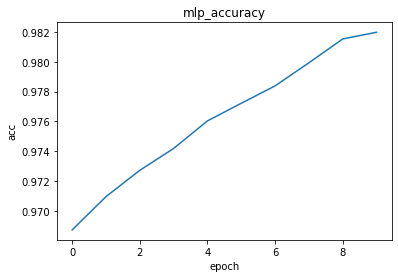

In [56]:
plt.plot(result.history['accuracy'])
plt.title('mlp_accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()